Github: https://github.com/GBrenner1/COMP3800Project1 
Dataset: https://www.kaggle.com/datasets/lorentzyeung/all-japanese-anime-titles-in-imdb

The data set I have selected has 45000~ rows covering animated shows by episode. I am interested in seeing the top top 5 collections of genres to see what they may have incommon that effects the success of a show. I'll do this by comparing Genre to user ratings and gross income.

In [156]:
import pandas as pd

pd.set_option('display.max_rows', None)

anime_df = pd.read_csv('imdb_anime.csv')
anime_df.head()

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,Episode,Episode Title
0,One Piece,"Animation, Action, Adventure",8.9,"187,689",24 min,(1999– ),Follows the adventures of Monkey D. Luffy and ...,"Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Ton...",TV-14,NaN,187689,0,NaN
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"Animation, Action, Adventure",7.4,"28,895",99 min,(2023),The film follows the Turtle brothers as they w...,NaN,PG,74,28895,0,NaN
2,The Super Mario Bros. Movie,"Animation, Adventure, Comedy",7.1,"189,108",92 min,(2023),A plumber named Mario travels through an under...,NaN,PG,46,189108,0,NaN
3,Attack on Titan,"Animation, Action, Adventure",9.1,"434,457",24 min,(2013–2023),After his hometown is destroyed and his mother...,"Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ish...",TV-MA,NaN,434457,0,NaN
4,Jujutsu Kaisen,"Animation, Action, Adventure",8.5,"82,909",24 min,(2020– ),A boy swallows a cursed talisman - the finger ...,"Junya Enoki,Yûichi Nakamura,Adam McArthur,Yuma...",TV-MA,NaN,82909,0,NaN


In [157]:
#grabbing only the columns I want for my analysis removing unwanted data
anime_df = anime_df[['Genre', 'User Rating', 'Gross']]
anime_df.dropna(inplace=True)
anime_df.drop(anime_df[anime_df['User Rating'] == 'User Rating'].index, inplace=True)

#converting the columns to the correct types
anime_df['User Rating'] = anime_df['User Rating'].astype(float)
anime_df['Gross'] = anime_df['Gross'].astype(float)

print(anime_df.head())
print(anime_df.shape)

                          Genre  User Rating     Gross
0  Animation, Action, Adventure          8.9  187689.0
1  Animation, Action, Adventure          7.4   28895.0
2  Animation, Adventure, Comedy          7.1  189108.0
3  Animation, Action, Adventure          9.1  434457.0
4  Animation, Action, Adventure          8.5   82909.0
(25008, 3)


In [158]:
#Next I get all the variations of genere groupings
genre_groups = anime_df['Genre'].unique()
print(genre_groups)
print(len(genre_groups))

['Animation, Action, Adventure' 'Animation, Adventure, Comedy'
 'Animation, Drama, Family' 'Animation, Action, Drama'
 'Animation, Adventure, Drama' 'Animation, Action, Comedy'
 'Animation, Adventure, Family' 'Animation, Crime, Drama'
 'Animation, Drama, Fantasy' 'Animation, Comedy, Family'
 'Animation, Comedy, Drama' 'Animation, Family, Fantasy'
 'Animation, Drama, War' 'Animation, Adventure, Mystery'
 'Animation, Action, Fantasy' 'Animation, Action, Crime'
 'Animation, Drama' 'Animation, Biography, Drama'
 'Animation, Comedy, Romance' 'Animation, Adventure, Sci-Fi'
 'Animation, Sport, Thriller' 'Animation, Drama, Thriller'
 'Animation, Drama, Horror' 'Animation, Action, Sport' 'Animation, Comedy'
 'Animation, Action, Sci-Fi' 'Animation, Drama, Romance'
 'Animation, Adventure, Fantasy' 'Animation, Sci-Fi, Thriller'
 'Animation, Drama, Mystery' 'Animation, Comedy, Music'
 'Animation, Comedy, Fantasy' 'Animation, Biography, Comedy'
 'Animation, Comedy, Sport' 'Animation, Crime, Mystery'

In [159]:
#Now I want to get the average rating for each genre grouping and sorting to get the top 5 values
genre_ratings = {}
for genre in genre_groups:
    genre_ratings[genre] = anime_df[anime_df['Genre'] == genre]['User Rating'].mean()
genre_ratings = dict(sorted(genre_ratings.items(), key=lambda item: item[1], reverse=True))
genre_ratings = dict(list(genre_ratings.items())[0:5])
print(genre_ratings)

#Now I want to get the average gross for each genre grouping
genre_gross = {}
for genre in genre_groups:
    genre_gross[genre] = anime_df[anime_df['Genre'] == genre]['Gross'].mean()
genre_gross = dict(sorted(genre_gross.items(), key=lambda item: item[1], reverse=True))
genre_gross = dict(list(genre_gross.items())[0:5])
print(genre_gross)



{'Animation, Documentary, Short': 9.2, 'Adventure, Short, Animation': 8.9, 'Animation, Sport, Thriller': 8.255555555555555, 'Animation, Horror, Thriller': 8.2, 'Animation, Family, History': 8.1}
{'Animation, Drama, War': 84343.0, 'Animation, Adventure, Family': 47836.9921875, 'Animation, Family, Fantasy': 39025.05714285714, 'Animation, Adventure, Comedy': 28606.308287292817, 'Animation, Biography, Drama': 17392.166666666668}


In [163]:
#Now we want to show the data in a table

ratings_df = pd.DataFrame.from_dict(genre_ratings, orient='index', columns=['Average Rating'])
gross_df = pd.DataFrame.from_dict(genre_gross, orient='index', columns=['Average Gross'])
display(ratings_df)
display(gross_df)

,Average Rating
"Animation, Documentary, Short",9.200000
"Adventure, Short, Animation",8.900000
"Animation, Sport, Thriller",8.255556
"Animation, Horror, Thriller",8.200000
"Animation, Family, History",8.100000


,Average Gross
"Animation, Drama, War",84343.000000
"Animation, Adventure, Family",47836.992188
"Animation, Family, Fantasy",39025.057143
"Animation, Adventure, Comedy",28606.308287
"Animation, Biography, Drama",17392.166667


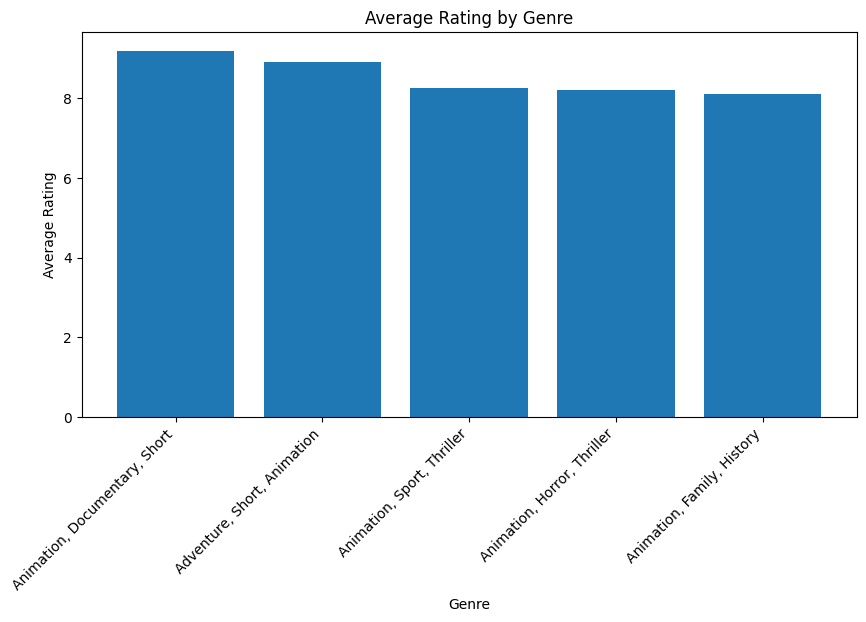

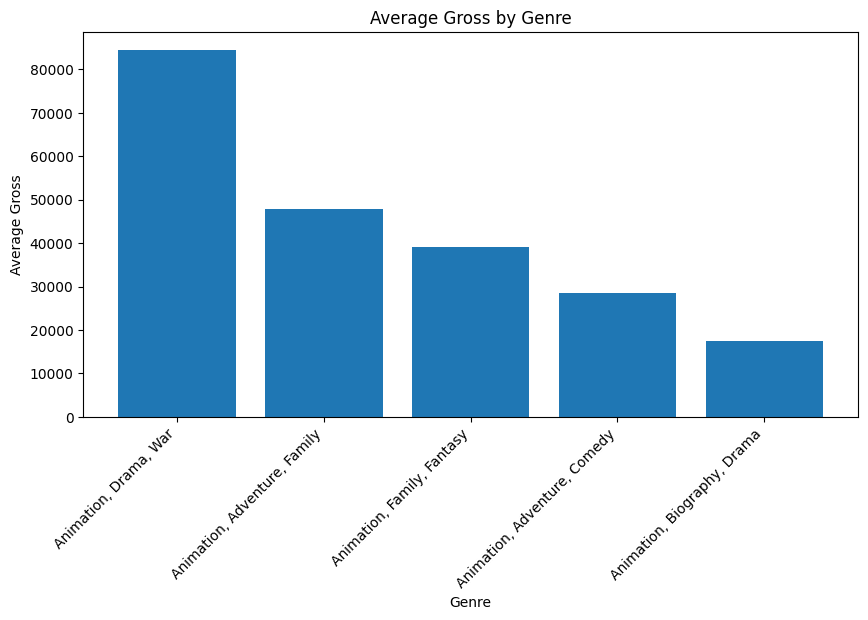

In [166]:
#finally we can show this data in a bar graph to make comparisons 
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(genre_ratings))
ax.bar(x, genre_ratings.values(), align='center')
ax.set_xticks(x)
ax.set_xticklabels(genre_ratings.keys())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_ylabel('Average Rating')
ax.set_xlabel('Genre')
ax.set_title('Average Rating by Genre')
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(genre_gross))
ax.bar(x, genre_gross.values(), align='center')
ax.set_xticks(x)
ax.set_xticklabels(genre_gross.keys())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_ylabel('Average Gross')
ax.set_xlabel('Genre')
ax.set_title('Average Gross by Genre')
plt.show()